## pandas ile veri maniplasyonu ve görselleştirme


pandas ile veri maniplasyonu ve seaborn, matlotlib ile veri görselleştirme

In [3]:
import pandas as pd
import seaborn as sns


dosya okuma, verş setini yükleme

In [4]:
df = pd.read_csv('supermarket.csv')


### data preprocessing

In [5]:
# EDA(keşifsel veri analizi)
df.head()

# df.sample(7) rastgele veri getir
# df.tail() son 5 veri
# df.info() veri tipleri    
# df.describe() istatistiksel veri
# df.isnull().sum() eksik veri
# df.shape veri boyutu
# df.columns kolon isimleri
# df.nunique() unique veri sayısı
# df['kolon_ismi'].value_counts() unique veri sayısısını gösterir

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum() # eksik veri toplamı 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
# df['Branch'] olarak yapabiliriz
# df.Branch[10:20:2] 10-20 arası 2 şer atlayarak veri getirir
df.Branch[10:20] # 10-20 arası veri getirir, 20 dahil değil


10    B
11    B
12    A
13    A
14    A
15    B
16    A
17    A
18    A
19    B
Name: Branch, dtype: object

In [9]:
import numpy as np

In [10]:
liste = np.arange(20)
df.Branch[::2] # 2 şer atlayarak veri getirir

0      A
2      A
4      A
6      A
8      A
      ..
990    A
992    A
994    C
996    B
998    A
Name: Branch, Length: 500, dtype: object

In [11]:
df.Branch.unique() # unique veri sayısı

array(['A', 'C', 'B'], dtype=object)

In [12]:
df.City.unique()


array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['Customer type'].unique()


array(['Member', 'Normal'], dtype=object)

In [15]:
df['Product line'].nunique()

6

In [16]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

In [17]:
df.Total.mean()

322.966749

In [18]:
df.Total.median()

253.848

### özellik mühendisliği, future engneering

zaman serisi

In [21]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [25]:
df['day']= df.Date.dt.day
df.Day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Day, Length: 1000, dtype: int32

In [27]:
df['month']= df.Date.dt.month
df.month

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: month, Length: 1000, dtype: int32

In [29]:
df.month.unique()

array([1, 3, 2])

In [30]:
df['year']= df.Date.dt.year
df.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: year, Length: 1000, dtype: int32

In [31]:
df.year.unique()

array([2019])

In [38]:
df['month_name'] = df['Date'].dt.month_name()
df['month_name']

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: month_name, Length: 1000, dtype: object

In [40]:
df['day_name'] = df['Date'].dt.day_name()
df['day_name']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_name, Length: 1000, dtype: object

In [44]:
df['Time']= pd.to_datetime(df['Time'])
df['Time']

0     2024-03-02 13:08:00
1     2024-03-02 10:29:00
2     2024-03-02 13:23:00
3     2024-03-02 20:33:00
4     2024-03-02 10:37:00
              ...        
995   2024-03-02 13:46:00
996   2024-03-02 17:16:00
997   2024-03-02 13:22:00
998   2024-03-02 15:33:00
999   2024-03-02 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [46]:
df['Hour']= (df['Time']).dt.hour
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int32

In [47]:
import matplotlib.pyplot as plt

([0, 1, 2],
 [Text(0, 0, 'January'), Text(1, 0, 'March'), Text(2, 0, 'February')])

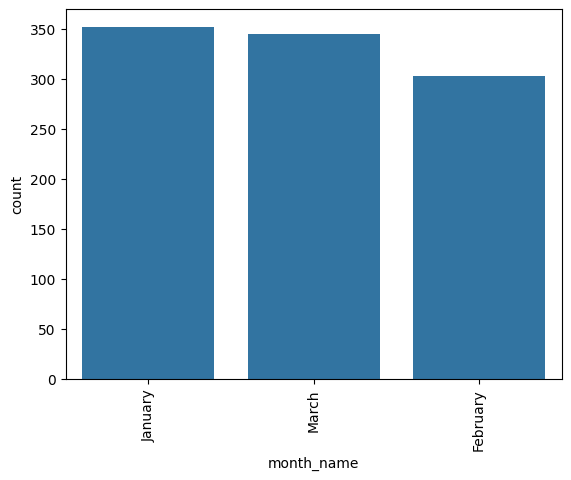

In [51]:
plt.Figure(figsize=(10,6))
sns.countplot(x=df['month_name'], data=df)
plt.xticks(rotation=90)


<Axes: xlabel='month_name', ylabel='count'>

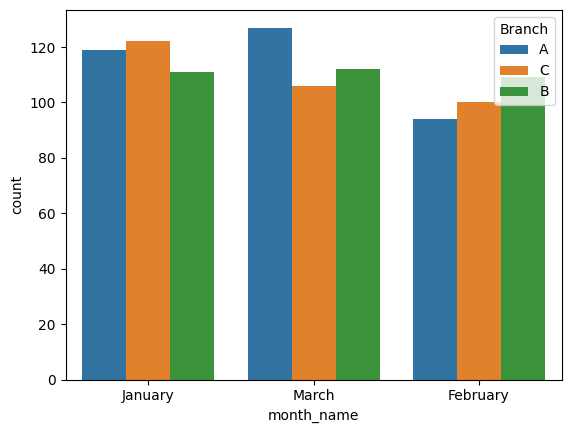

In [57]:
sns.countplot(x=df['month_name'], hue=df['Branch'], data=df)
#plt.xticks(rotation=90)


<Axes: xlabel='month_name', ylabel='count'>

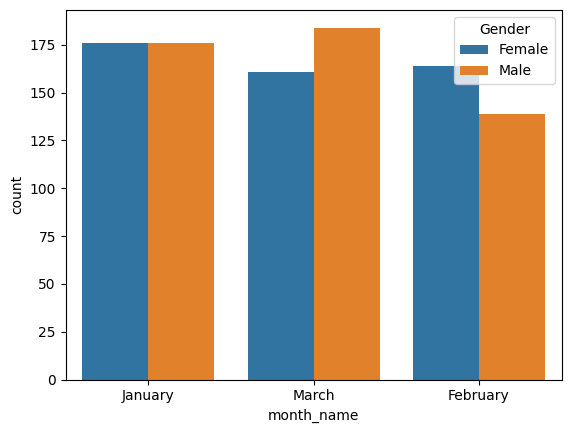

In [58]:
sns.countplot(x=df['month_name'], hue=df['Gender'], data=df)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Tuesday')])

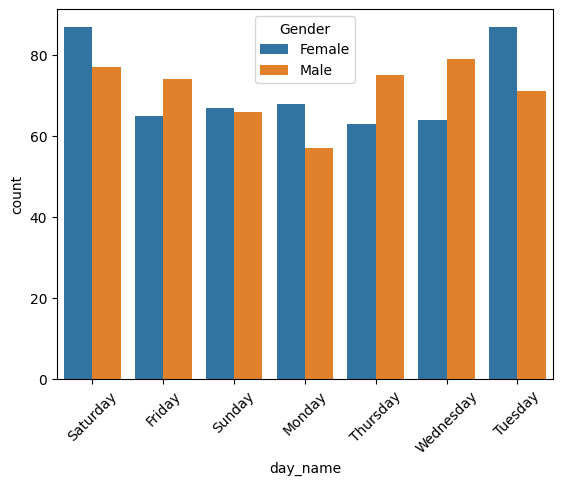

In [62]:
sns.countplot(x=df['day_name'], hue=df['Gender'], data=df)
plt.xticks(rotation=45)

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_6584\1344641164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_name'],palette='bright', data=df)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Tuesday')])

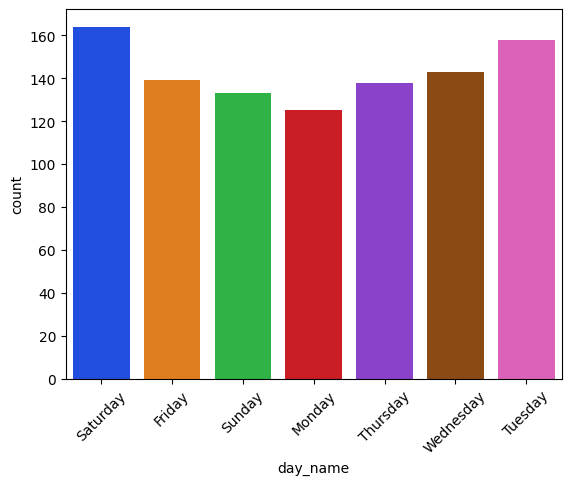

In [69]:
plt.Figure(figsize=(10,6))
sns.countplot(x=df['day_name'], palette='bright', data=df)
plt.xticks(rotation=45)

In [65]:
df['month_name'].value_counts() 

month_name
January     352
March       345
February    303
Name: count, dtype: int64

<Axes: ylabel='count'>

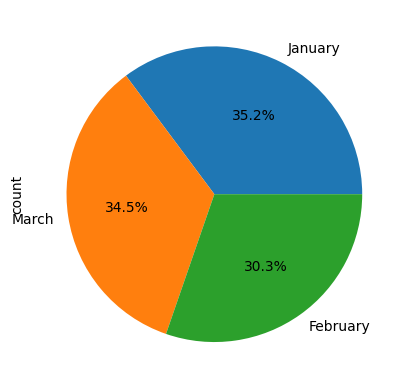

In [68]:
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

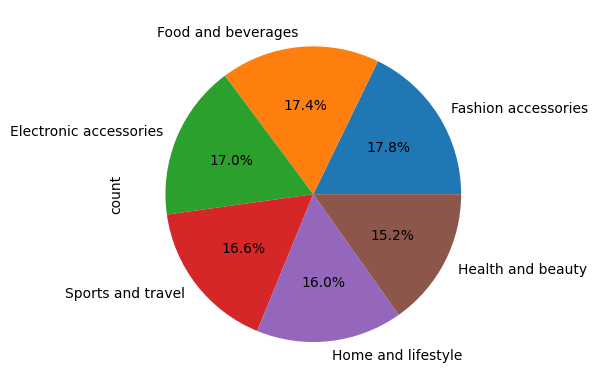

In [72]:
df['Product line'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

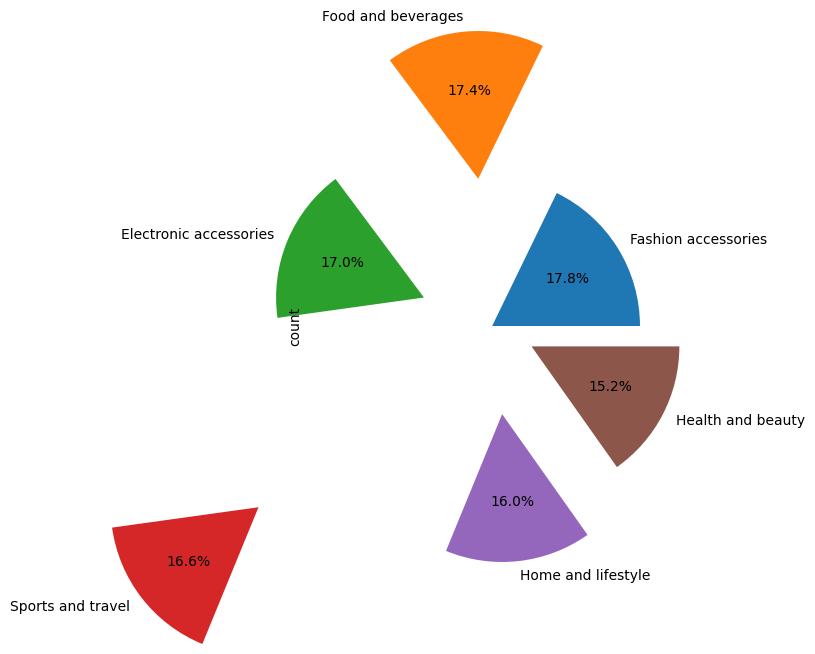

In [75]:
df['Product line'].value_counts().plot.pie(autopct='%1.1f%%', explode=(0,1,0.5,2,0.6,0.3))

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

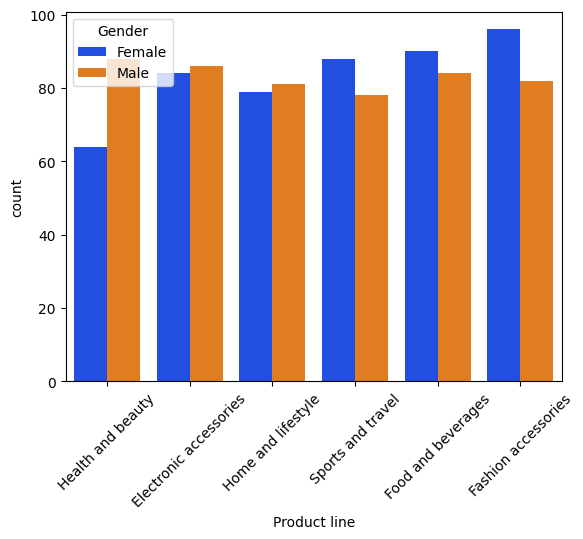

In [93]:
sns.countplot(x=df['Product line'], hue='Gender',  palette='bright', data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

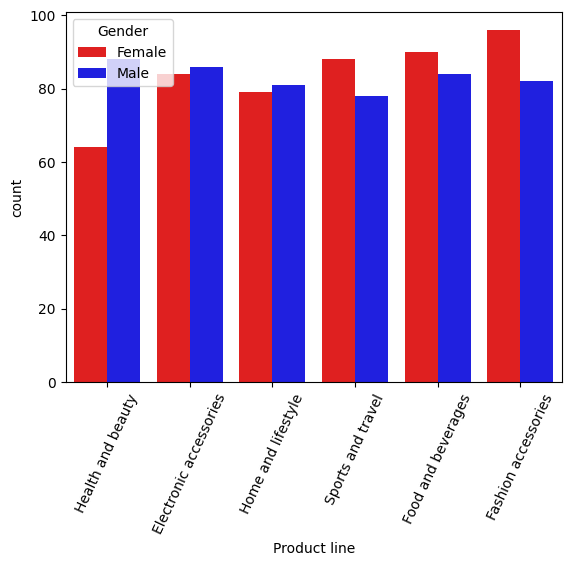

In [94]:
renkler={'Male':'blue', 'Female':'red'}  # 'female' için büyük 'F' harfi önemli
sns.countplot(x=df['Product line'], hue='Gender', palette=renkler, data=df) 
plt.xticks(rotation=65)


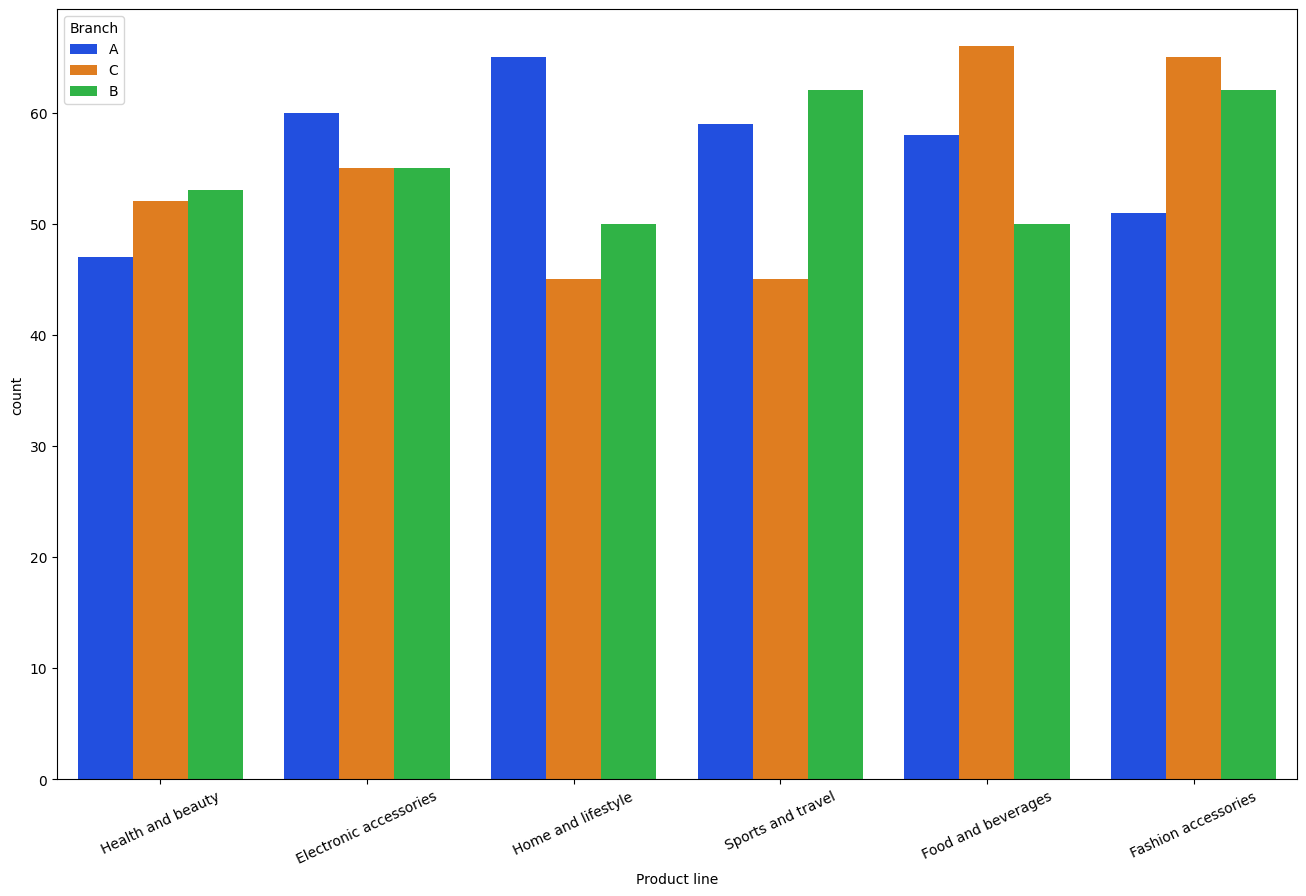

In [102]:
plt.figure(figsize=(16,10))  
sns.countplot(x=df['Product line'], hue='Branch', palette='bright', data=df)
plt.xticks(rotation=25)
plt.savefig('product_line.png')


In [103]:
df.Rating

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_6584\349737975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='Rating',palette='bright', data=df)


<Axes: xlabel='Branch', ylabel='Rating'>

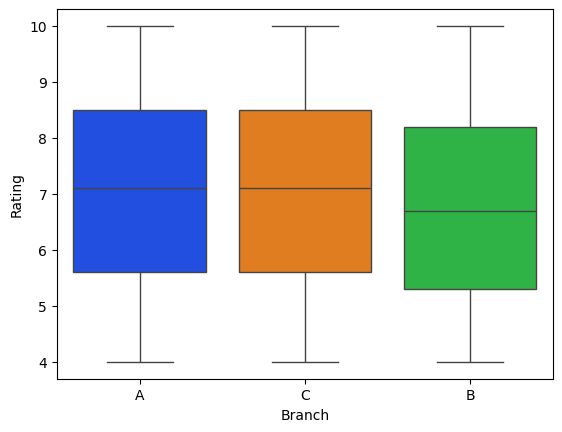

In [106]:
sns.boxplot(x='Branch', y='Rating',palette='bright', data=df)

In [108]:
df.groupby('Gender')['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

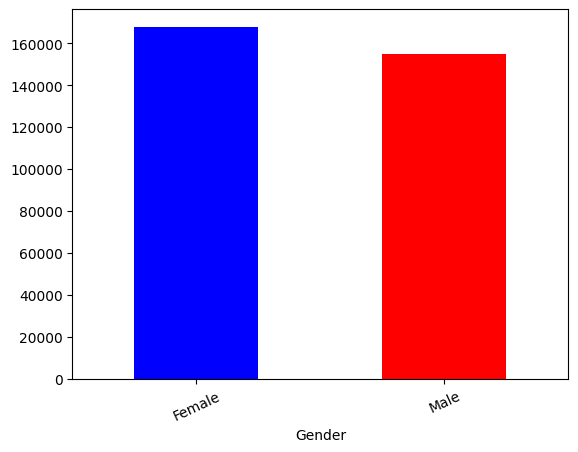

In [111]:
df.groupby('Gender')['Total'].sum().plot.bar(color=['blue', 'red'])
plt.xticks(rotation=25)


C:\Users\ahmi_\AppData\Local\Temp\ipykernel_6584\1151708171.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Hour', y='Quantity',palette='bright', data=df)


<Axes: xlabel='Hour', ylabel='Quantity'>

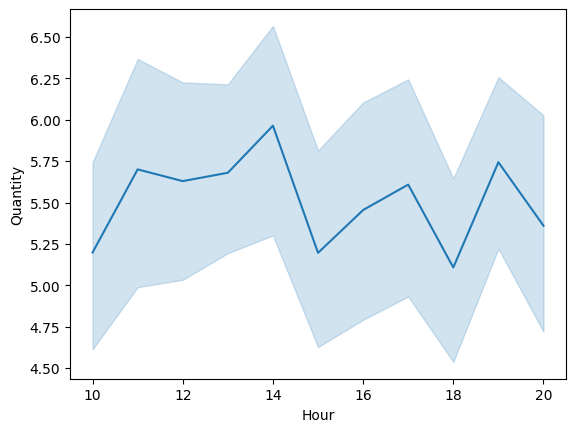

In [117]:
sns.lineplot(x='Hour', y='Quantity',palette='bright', data=df)

In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

<Axes: xlabel='Hour'>

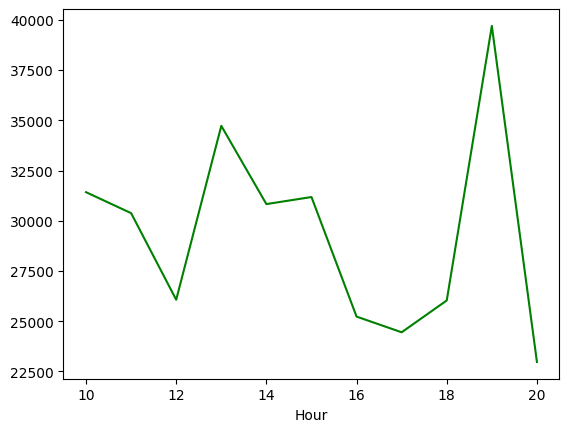

In [123]:
df.groupby('Hour')['Total'].sum().plot.line(color='green')

In [126]:
df.groupby('Hour')['Quantity'].sum()

Hour
10    525
11    513
12    501
13    585
14    495
15    530
16    420
17    415
18    475
19    649
20    402
Name: Quantity, dtype: int64

In [131]:
df.groupby('Hour')['Branch'].count()

Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Branch, dtype: int64

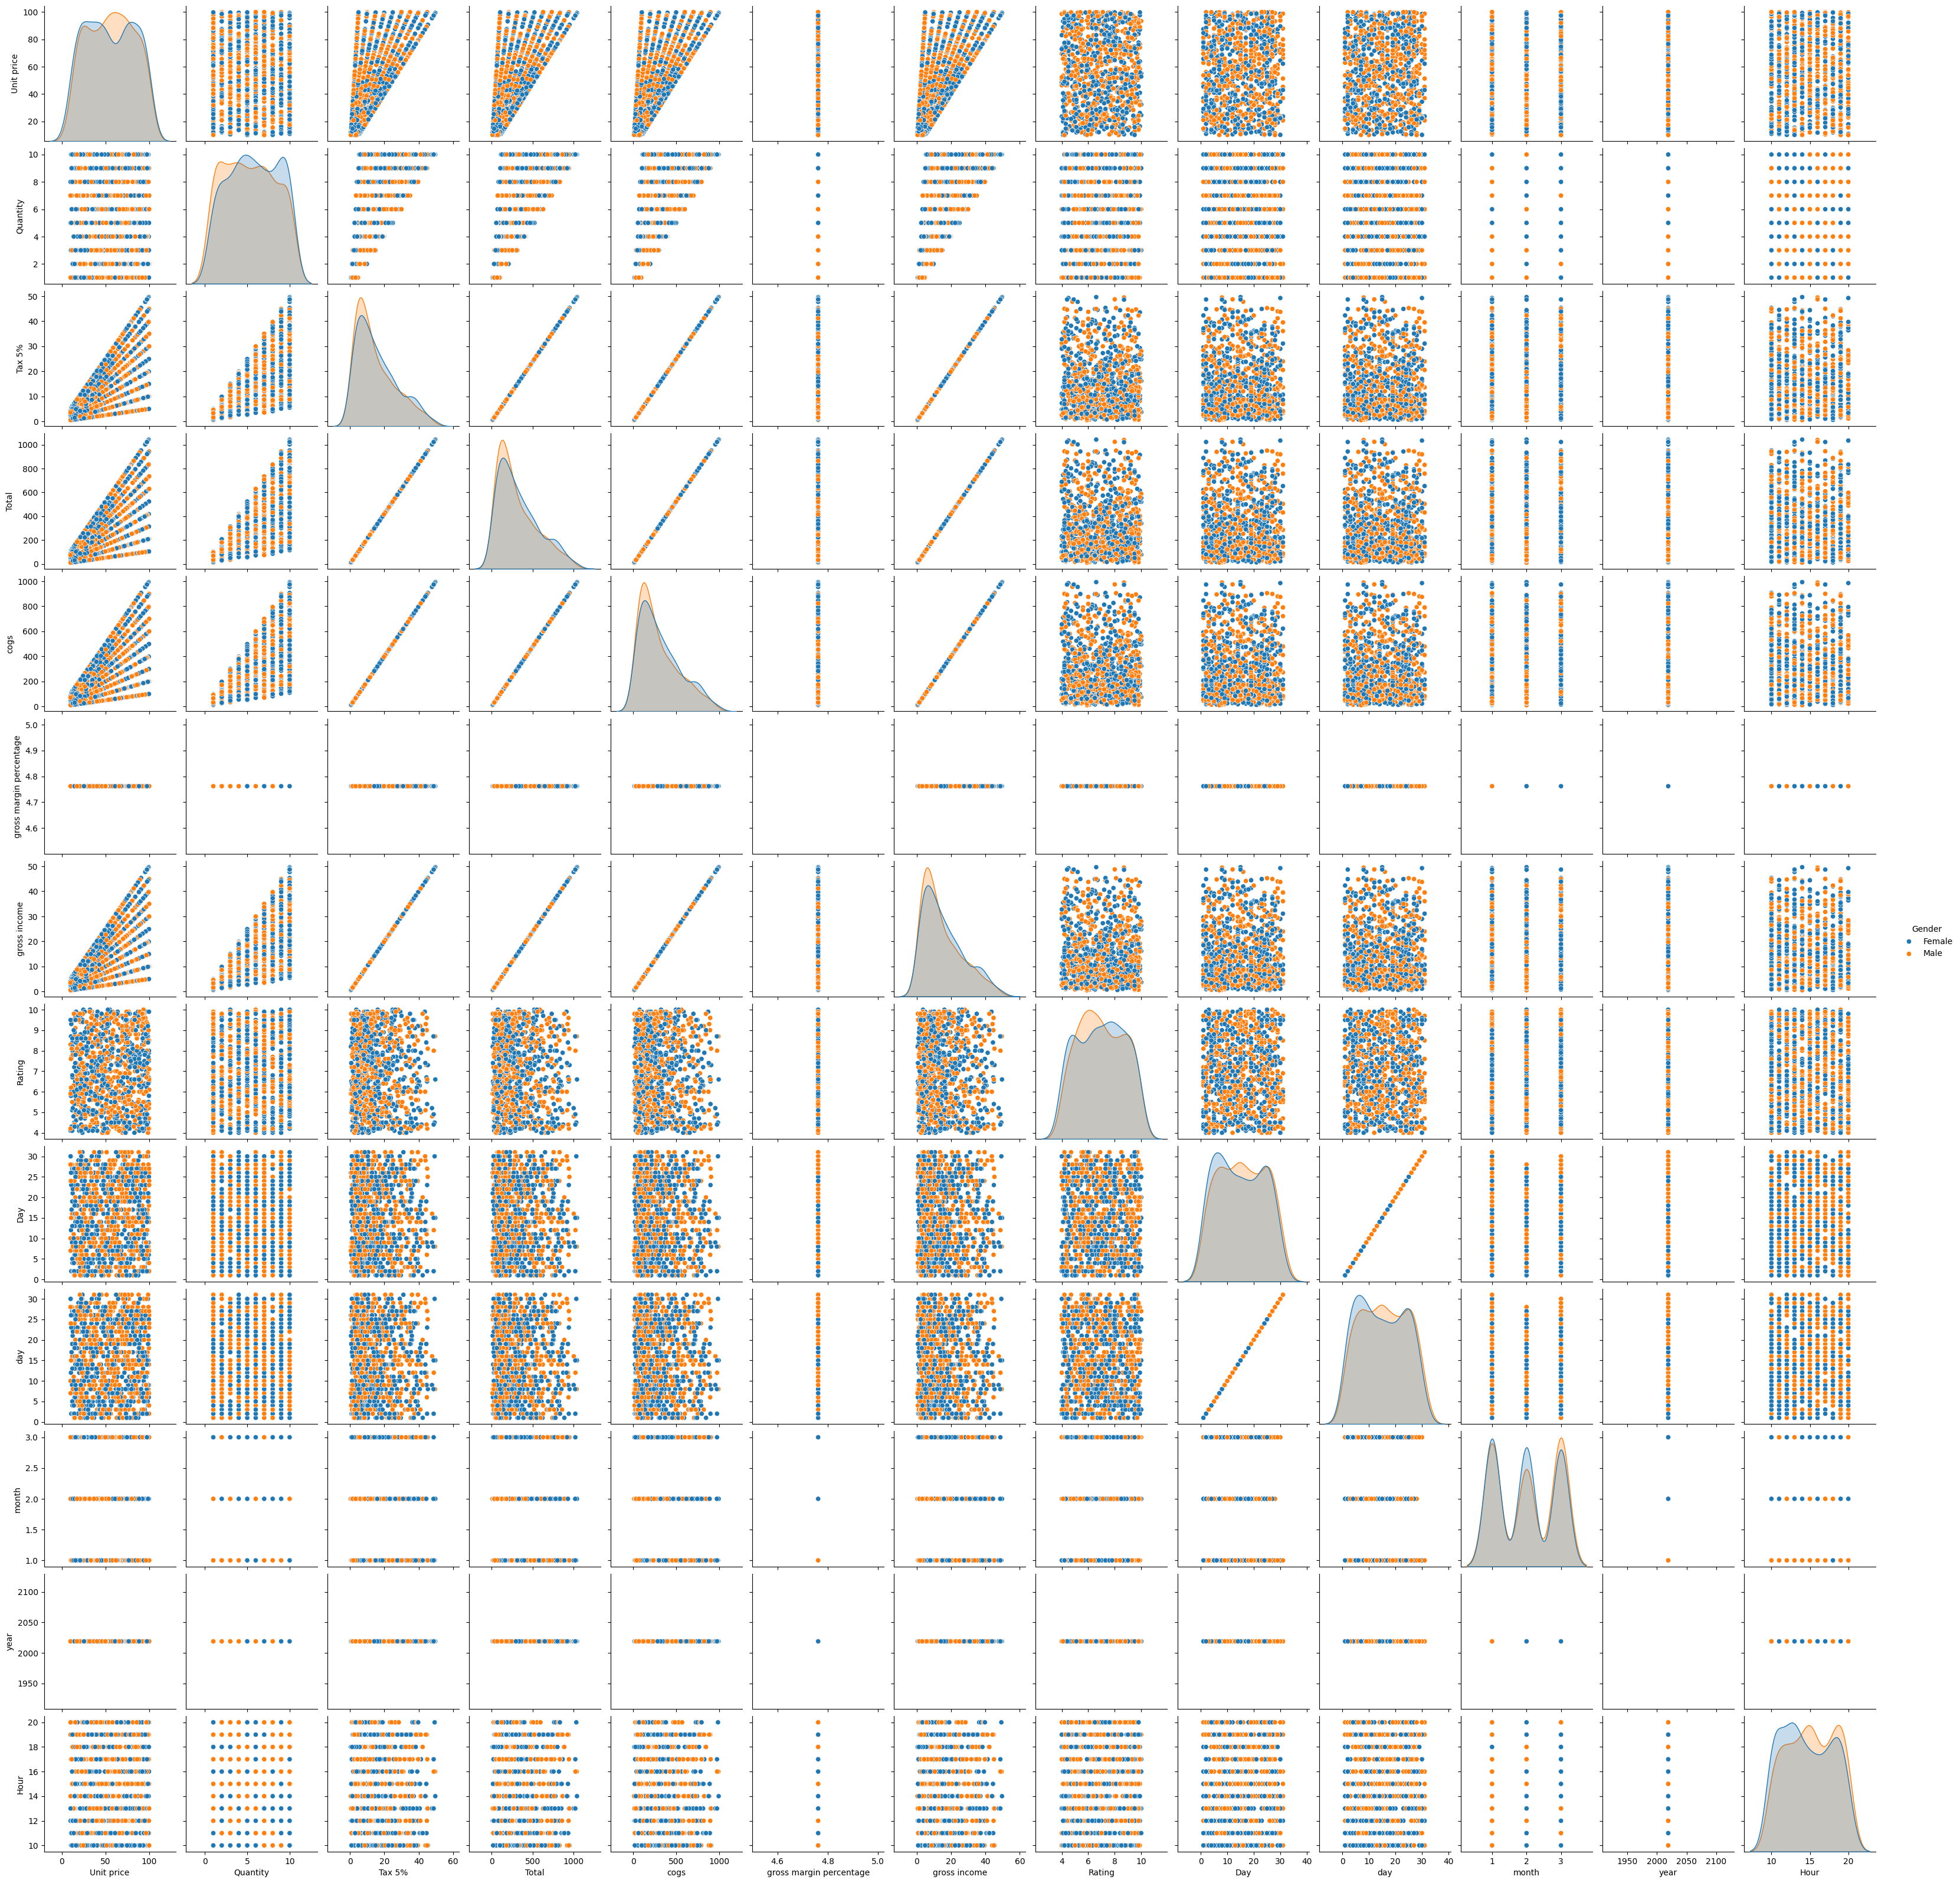

In [132]:
sns.pairplot(df,hue='Gender')

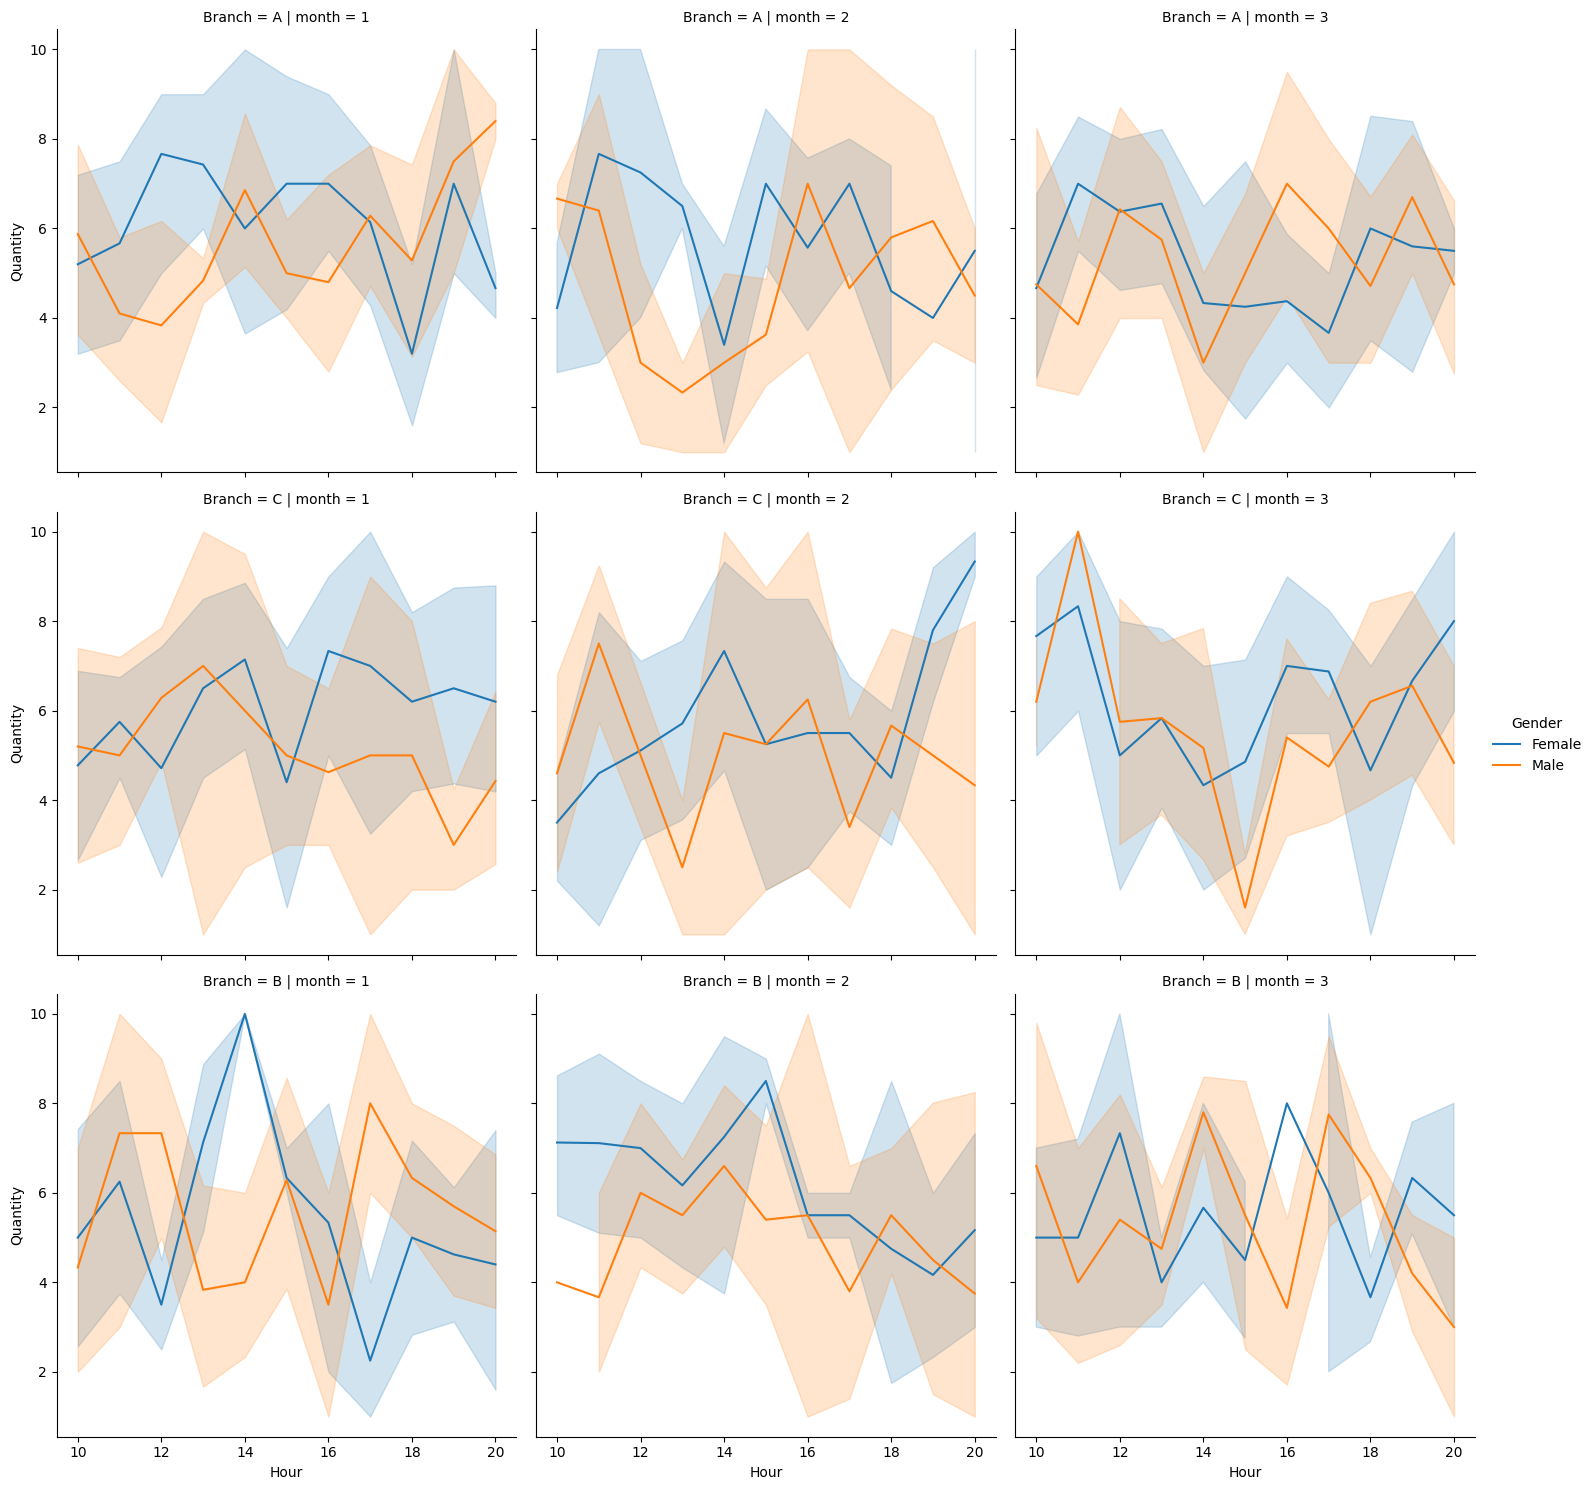

In [135]:
sns.relplot(x='Hour', y='Quantity', col='month', row='Branch', kind='line', hue='Gender', data=df)  

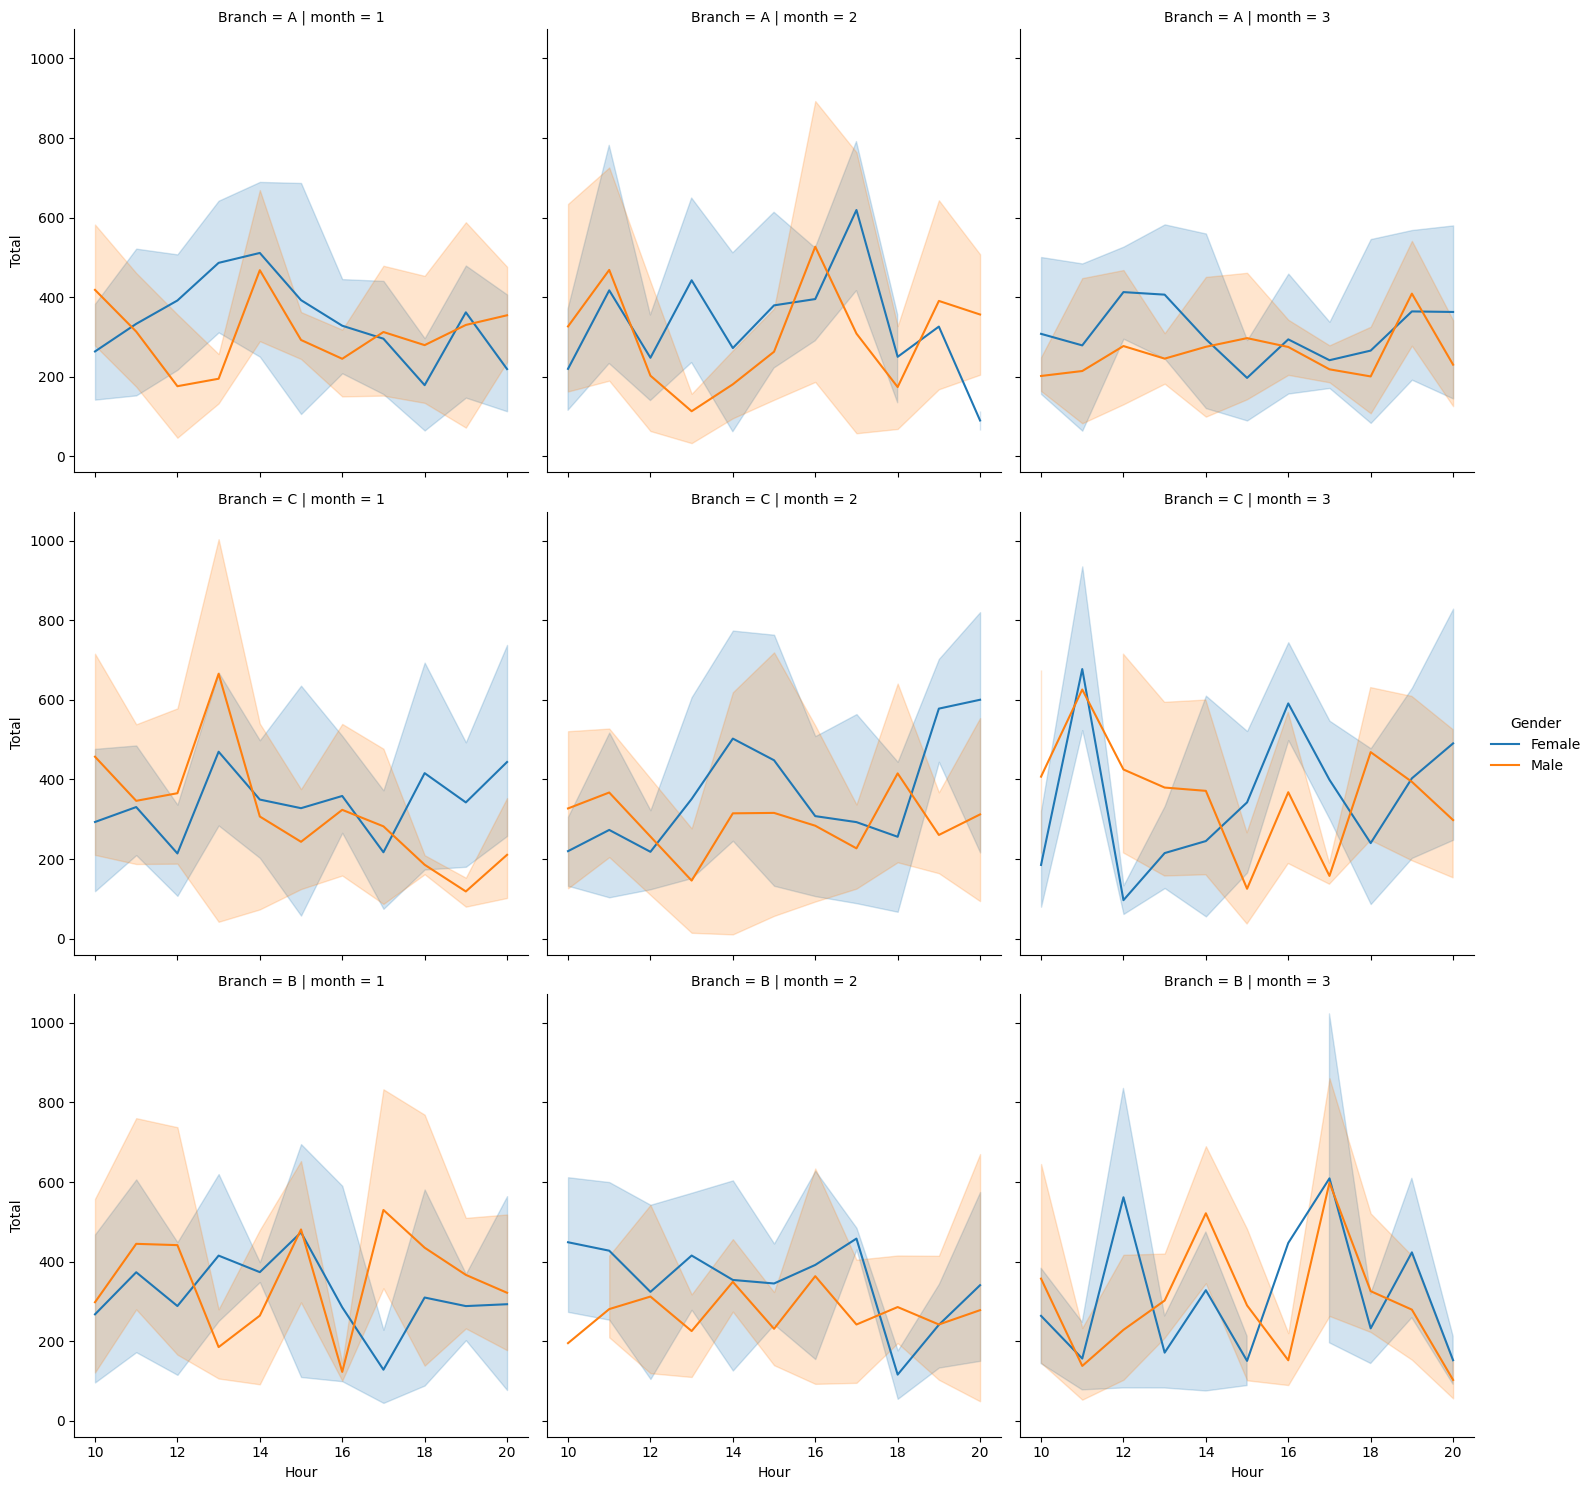

In [136]:
sns.relplot(x='Hour', y='Total', col='month', row='Branch', kind='line', hue='Gender', data=df)